In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("/home/hybrid/unbalaced_20_80_dataset.csv",index_col=0,low_memory=False)



/root/pydev/py36-venv/lib64/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
train.shape

(7616509, 84)

In [6]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))

train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [8]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [9]:
print(train.shape)
print(X.shape)
print(Y.shape)

(7616509, 84)
(7616509, 83)
(7616509,)


In [10]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5103061, 83)
(5103061,)
(2513448, 83)
(2513448,)


#####Feature Importance






In [12]:
%%time

model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: user 40.7 s, sys: 3.17 s, total: 43.9 s
Wall time: 43.9 s


In [13]:
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [20]:
#####plotting tree
#from sklearn import tree
#from sklearn.externals.six import StringIO  
#import pydot 


#dot_data = StringIO() 
#tree.export_graphviz(model, out_file=dot_data) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

#graph[0].write_pdf("tree.pdf")  # must access graph's first element

In [15]:
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.9993029495736534
f1-acore: 0.9979514809670131
confusion matrix:
 [[2084946    1418]
 [    334  426750]]
Precision: 0.9966882158405111
Recall_score: 0.9992179524402693
Misclassified : 1752


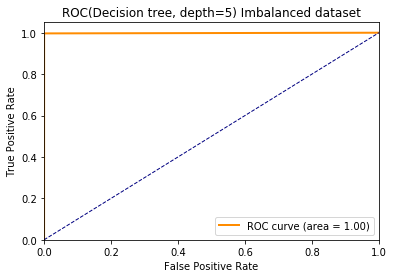

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Decision tree, depth=5) Imbalanced dataset')
plt.legend(loc="lower right")
plt.show()
